# 03 Geometric Machine Learning for Shapes

## A) Mean and Covariance

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE

<center><img src="figs/03_frechetmean.png" width=350px alt="default"/></center>

# Outline of ECE 594n

- Unit 1 (Geometry): Differential Geometry for Engineers
- Unit 2 (Shapes): Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**

<center><img src="figs/hero_brain_mris_3360x960_417KB.jpg" width=1400px alt="default"/></center>

Examples taken from cutting-edge research in the **biomedical field**.

# AI and Machine Learning (ML)

$\color{#EF5645}{\text{Definition}}$: _Artificial Intelligence_ (AI) represents the techniques that enable machines to mimic human intelligence.

$\color{#047C91}{\text{Example}}$: We can hard-code a chess strategy in a computer,by a decision tree deciding what is the best move for the computer given a situation on the board.



$\color{#EF5645}{\text{Definition}}$: _Machine Learning_ (ML) represents the techniques that enable machines to mimic human intelligence by learning from data.

$\color{#047C91}{\text{Example}}$: The computer has learned what is the next best move, by looking at millions of chess games.

$\color{#EF5645}{\text{Remark}}$: ML is therefore a sub-field of AI.

# Machine Learning on Manifolds?

We already generalized the elementary operations.

- $\color{#EF5645}{\text{Addition}}$: add a vector to a point to get a point --> $\color{#047C91}{\text{Exponential}}$
- $\color{#EF5645}{\text{Subtraction}}$: subtract two points to get a vector --> $\color{#047C91}{\text{Logarithm}}$
- $\color{#EF5645}{\text{Distance}}$: compute distance between two points --> $\color{#047C91}{\text{Geodesic Distance}}$
- $\color{#EF5645}{\text{Straight Line}}$: computing the curve of shortest length between two points --> $\color{#047C91}{\text{Geodesic}}$

Now, we generalize the  machine learning concepts.

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - **A) Mean and Covariance**
    - Motivation: mean of cancer cell shapes
    - Practice: the class `FrechetMean`
    - Theory: definitions of mean and covariance
    - Application to cancer cell shapes
  - B) Classification
  - C) Regression
  - D) Clustering
  - E) Dimension Reduction

# Motivation: Mean of Cancer Cells

$\color{#EF5645}{\text{Question}}$: Which cancer treatments have a stronger effect on the actin and cytoskeleton?

$\color{#EF5645}{\text{Approach}}$: Compute the **mean shape** for each cancer treatment and see which ones are more irregular.

$\rightarrow$ Generalize the notion of "mean" to manifolds, such as shape spaces of curves.

<center><img src="figs/02_cells.png" width=1300px alt="default"/></center>

<center><img src="figs/03_meancell.png" width=400px alt="default"/></center>

This leads to the question:

- What is in the code of `FrechetMean` ?

<center><img src="figs/03_meancell_irregular.png" width=900px alt="default"/></center>

# Practice: Fréchet Mean

Machine Learning (ML) on manifolds follows 3 steps.

$\color{#047C91}{\text{Example}}$: Computation of the mean of two points on the sphere.

1. $\color{#EF5645}{\text{Geometry:}}$ Instantiate manifold.

In [1]:
from geomstats.geometry.hypersphere import Hypersphere
sphere = Hypersphere(dim=2)

INFO: Using numpy backend


2. $\color{#EF5645}{\text{Learning:}}$ Instantiate learning.

In [2]:
from geomstats.learning.frechet_mean import FrechetMean
estimator = FrechetMean(sphere.metric)

3. $\color{#EF5645}{\text{Fit:}}$ Apply to data.

In [3]:
import numpy as np
data = np.stack([sphere.random_point(), sphere.random_point()])
estimator.fit(data)
estimator.estimate_

array([0.32296337, 0.70265731, 0.63400896])

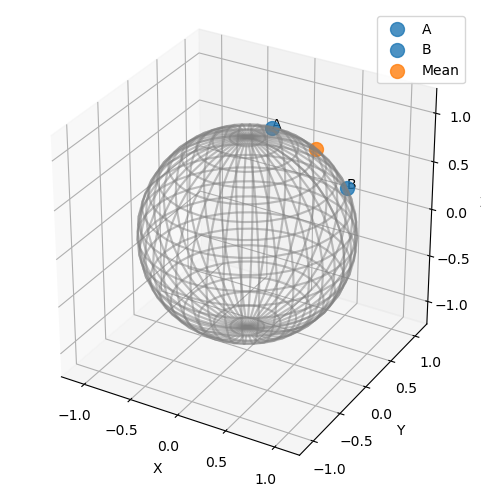

In [4]:
import geomstats.visualization as viz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax = viz.plot(data[0], ax=ax, space="S2", s=100, alpha=0.8, label="A", c="C0")
ax = viz.plot(data[1], ax=ax, space="S2", s=100, alpha=0.8, label="B", c="C0")
ax = viz.plot(estimator.estimate_, ax=ax, space="S2", s=100, alpha=0.8, label="Mean", c="C1")
ax.legend()

# Theory: Traditional Mean and Covariance

## Mean

Consider a dataset of points in a vector space $x_1, ..., x_n \in \mathbb{R}^m$. 

$\color{#EF5645}{\text{Definition}}$: The _sample mean_ of points $x_1, ..., x_n$ is defined as:
$$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i.$$

$\color{#EF5645}{\text{Remark}}$: This is a linear definition: the mean is a linear combination of the data points.

## Covariance

Consider a dataset of points in a vector space $x_1, ..., x_n \in \mathbb{R}^m$.

$\color{#EF5645}{\text{Definition}}$: The (unbiased) _sample covariance_ of points $x_1, ..., x_n$ is defined as:
$$\Sigma = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})(x_i - \bar{x})^T =\left(\begin{array}{ccc}\operatorname{Var}\left(x^{(1)}\right) & \ldots & \operatorname{Cov}\left(x^{(1)}, x^{(m)}\right) \\ \vdots & \ddots & \vdots \\ \operatorname{Cov}\left(x^{(m)}, x^{(1)}\right) & \ldots & \operatorname{Var}\left(x^{(m)}\right)\end{array}\right).$$

$\color{#047C91}{\text{Example}}$: Illustration of mean and covariance for $m=2$: $n$ data points in 2 dimensions.
<center><img src="figs/03_meancov.png" width=500px alt="default"/></center>

## Need for Generalization to Manifolds

Why not directly use the traditional definitions of mean and covariance on manifolds?

In [24]:
sphere = Hypersphere(dim=2)
points = sphere.projection(np.array([
     [-0.71502435, -0.41197257, -0.56481748],
     [-0.997575,   -0.04788171,  0.05051201]
]))
print(sphere.belongs(points))
linear_mean = np.sum(points, axis=0) / 2
print(linear_mean)

[ True  True]
[-0.85629967 -0.22992714 -0.25715273]


We plot the points and their mean computed with the linear formula.

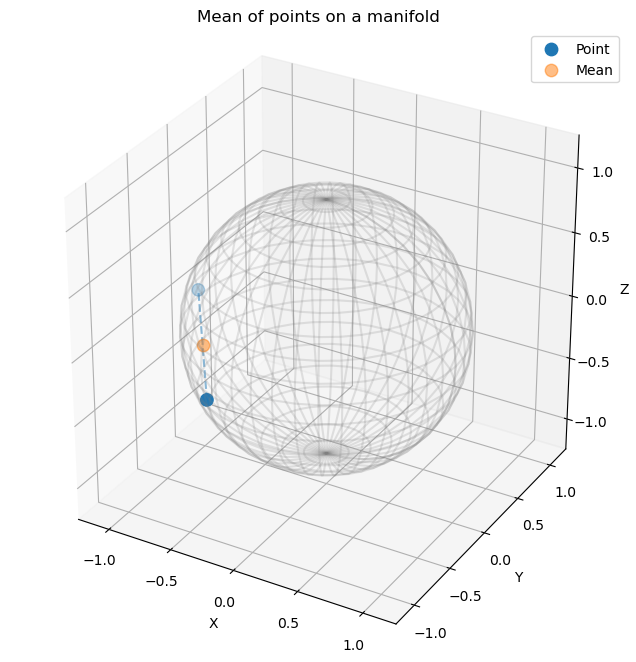

In [25]:
fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot(111, projection="3d")
viz.plot(points, ax=ax, space="S2", label="Point", s=80)
ax.plot(points[:, 0], points[:, 1], points[:, 2], linestyle="dashed", alpha=0.5,)
ax.scatter(linear_mean[0], linear_mean[1], linear_mean[2], label="Mean", s=80, alpha=0.5)
ax.set_title("Mean of points on a manifold"); ax.legend();

What happened? The mean of two points on a manifold (the sphere) is not on the manifold. 

$\color{#047C91}{\text{Example}}$: The mean of two cell shapes would not be a cell shape!

In [26]:
print(sphere.belongs(linear_mean))

False


Instead, we need to compute a generalization of the mean for manifolds: the Frechet mean.

In [6]:
from geomstats.learning.frechet_mean import FrechetMean

mean = FrechetMean(metric=sphere.metric)
mean.fit(points)
frechet_mean = mean.estimate_

We plot the points and their mean computed with the generalization of the mean to manifolds.

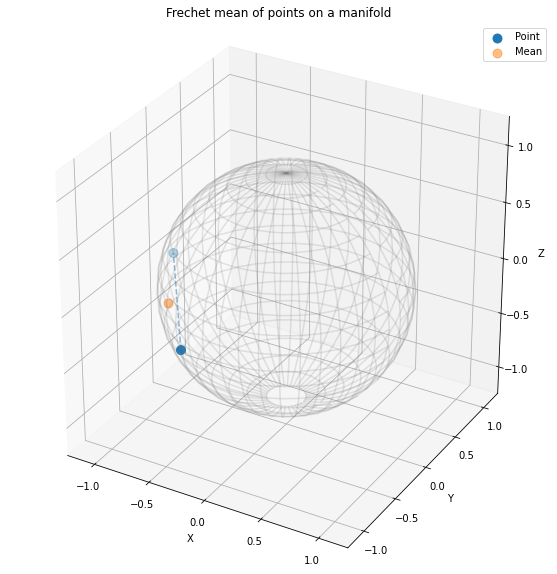

In [9]:
import matplotlib.pyplot as plt
import geomstats.visualization as viz

fig = plt.figure(figsize=((10, 10))); ax = fig.add_subplot(111, projection="3d")
viz.plot(points, ax=ax, space="S2", label="Point", s=80)
ax.plot(points[:, 0], points[:, 1], points[:, 2], linestyle="dashed", alpha=0.5,)
ax.scatter(frechet_mean[0], frechet_mean[1], frechet_mean[2], label="Mean", s=80, alpha=0.5)
ax.set_title("Frechet mean of points on a manifold"); ax.legend();

# Theory: Mean and Covariance on Manifolds

## Generalizing the Definition of Mean

We use a property of the mean on vector spaces, and make this property the definition of the mean on manifolds.

$\color{#6D7D33}{\text{Property}}$: Consider a dataset of points in a vector space $x_1, ..., x_n \in \mathbb{R}^m$, and consider $\bar{x}$ their mean. Then, $\bar{x}$ verifies:
$$\bar{x} = \text{argmin}_x \sum_{i=1}^n ||x - x_i||^2 ,$$
i.e. the mean minimizes the sum of the square distances to the data points.

$\color{#047C91}{\text{Exercise}}$: This property uses a notion of squared norm $||^2$: how will we generalize this to manifolds?

<center><img src="figs/03_means.jpg" width=700px alt="default"/></center>

## Fréchet Mean on $M$ 

Consider a dataset of points on a manifold $x_1, ..., x_n \in M$

$\color{#EF5645}{\text{Definition}}$: The Fréchet mean(s) of points $x_1, ..., x_n$ are the point(s) that verify:
$$\bar{x} = \text{argmin}_{x \in M} \sum_{i=1}^n d(x, x_i)^2 ,$$
i.e. the mean minimizes the sum of the square _geodesic_ distances to the data points.

$\color{#047C91}{\text{Exercise}}$: Can we have several Fréchet means for a given dataset? Give an example.

$\color{#EF5645}{\text{Remark}}$: The mean is the result of a minimization, implemented with gradient descent, in `FrechetMean`.

# Tangent Space at the Fréchet Mean

$\color{#EF5645}{\text{Method}}$: The Fréchet mean gives us a way of transforming our non-linear data into vectors:
- Compute the Fréchet mean $\bar{x}$ of the data points
- Consider the tangent space $T_\bar{x}M$of the manifold $M$ at $\bar{x}$
- Compute the Logarithms of the data points $x_i$ at $\bar{x}$:
  - $\text{Log}_{\bar{x}}x_1, ..., \text{Log}_{\bar{x}}x_n \in T_{\bar{x}}M$

$\rightarrow$ Get a dataset on a vector space.

$\rightarrow$ Use traditional ML and definitions (e.g. covariance) there.

<center><img src="figs/03_ts.png" width=400px alt="default"/></center>

## Covariance on $M$

$\color{#EF5645}{\text{Definition}}$: Consider a dataset of points on a manifold $x_1, ..., x_n \in M$, and their Fréchet mean $\bar{x}$. The (unbiased) sample covariance at $\bar{x}$ is defined by:
$$Cov(x) = \frac{1}{n-1} \sum_{i=1}^n \text{Log}_{\bar{x}}x_i.\text{Log}_{\bar{x}}x_i^T,$$
i.e. we use the traditional definition of covariance on the Logarithms of the points.

# Application to Cancer Cells


This explains the computations behind the mean of cancer cell shapes.
<center><img src="figs/03_meancell.png" width=1000px alt="default"/></center>

<center><img src="figs/03_meancell_irregular.png" width=900px alt="default"/></center>

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - **A) Mean and Covariance**
  - B) Classification
  - C) Regression
  - D) Clustering
  - E) Dimension Reduction